## Project 2 - Supervised Learning - Gradiant Descent and Classification
### Due: 4/2/2021 Frinday 11:59 PM

### Task
This project is broadly breakinto two parts: 
1. Gradient Descent Implementation - the task is to implement the gradien descent function to find all possible local mamina and gloabl minimum coordinates. 
2. Wine Quality Classifiaction Implementation - the task is to implement three classifiers, KNN, LDA, and Logistic Regresion, to classify the quality of red wine using a given data `winequality-red.csv`.

### Descriptions & Rules
1. All work must be your own. Any evidence of copying, collaborating, and cheating will result 0. 
2. This project does not require a report. However, all work and results must be discussed - simply answering or stating results is not acceptable. 
3. **The project will not allow any extenstions** - except a case of health and other emergencies. You must submit the project as incompletion if you do not finish on time. 
4. You must submit the **jupyter notebook** file and the **exported HTML** file. 
5. All codes must be excutable - if the code does not work, you will get 0 for that particular code. 

### Gradient Descent Implementation. 

We are going to implement a standard gradient decent optimization function `my_GradDes(x,y,z,theta,learning_rate,iteration)` to find all possible local maxima and global maximum coordinates. 

Data Set: `P2_1.csv` has four features. We have $x=(-4.0,4.0)$ and $y=(-4.0,4.0)$, the true $z$ value is a function of $x$ and $y$, $z=f(x,y)$, and $z_pred$ which is a predicted value of $z$. Below a 3-D plot is povided. 

Requirement:
1. The cost function: $J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h(\theta)^i-y^i))^2$
2. Gradient: $\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m}(h(\theta)^i-y^i)).X_j^i$

where $m=$number of observation. 


Task:
1. Test with the learning rate $\eta=[0.01, 0.05, 0.1, 1]$. 


Required Result: For each $\eta$, report
1. Iteration #
2. Did it overshoot?
3. Total number of local minima
4. The coordinates ($x,y$) for all local minima and global mimimum

Points: 
- Code: 25 points
- Test: 5 points
- Answers: 20 points

<IPython.core.display.Javascript object>


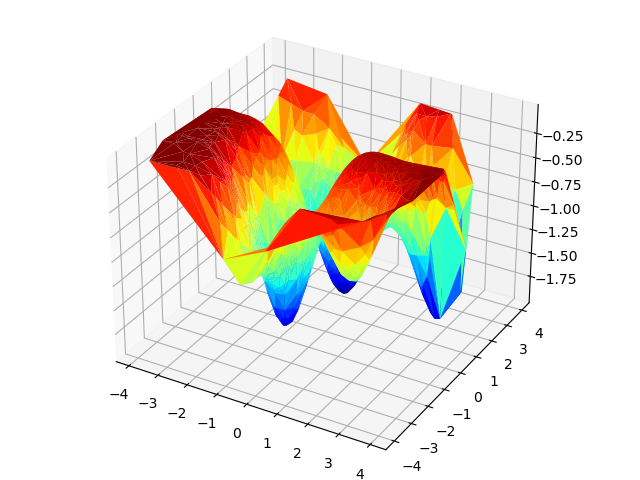

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
df = pd.read_csv('P2_1.csv')

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(df.x, df.y, df.z, cmap=cm.jet, linewidth=0.2)
plt.show()

In [2]:
### Code Starts Here

# data prepare
from tqdm.notebook import tqdm
import numpy as np
def my_func(x,y,theta):
    """Construct multinomial function to predict value with theta
    """
    z_pred = - ( np.exp(-((x+theta[0])**2+(y+theta[1])**2))  + np.exp(-((x-theta[2])**2+(y-theta[3])**2)) + np.exp(-(x+theta[4])**2) + 
               np.exp(-(y-theta[5])**2) + np.exp(-((x-theta[6])**2+(y+theta[7])**2)) )
    return z_pred


def partionalGradient(x,y,pred,label,theta,l2=False):
    """return all paritonalGradient value
    Return:
        correspond paritional gradient value
    """
    partionalgradient = [0]*len(theta)
    dt = pred - label
    partionalgradient[0] =  np.mean(dt*(np.exp(-((x+theta[0])**2+(y+theta[1])**2))*(x+theta[0])*2))
    partionalgradient[1] =  np.mean(dt*(np.exp(-((x+theta[0])**2+(y+theta[1])**2))*(y+theta[1])*2))
    partionalgradient[2] =  np.mean(dt*(np.exp(-((x-theta[2])**2+(y-theta[3])**2))*(x-theta[2])*(-2)))
    partionalgradient[3] =  np.mean(dt*(np.exp(-((x-theta[2])**2+(y-theta[3])**2))*(y-theta[3])*(-2)))
    partionalgradient[4] =  np.mean(dt*(np.exp(-((x+theta[4])**2))*(x+theta[4])*2))
    partionalgradient[5] =  np.mean(dt*(np.exp(-((y-theta[5])**2))*(y-theta[5])*(-2)))
    partionalgradient[6] =  np.mean(dt*(np.exp(-((x-theta[6])**2+(y+theta[7])**2))*(x-theta[6])*(-1)*2))
    partionalgradient[7] =  np.mean(dt*(np.exp(-((x-theta[6])**2+(y+theta[7])**2))*(y+theta[7])*2))
    if l2:
        for i in range(len(theta)):
            partionalgradient[i] = partionalgradient[i] + 0.1*theta[i] * 2
    return partionalgradient

def lossf(z_pred_batch,z_true_batch):
    """
    Return EMS
    """
    return np.mean((z_pred_batch - z_true_batch)**2) / 2

def updataValue(learning_rate,theta,partionalGradient):
    for i in range(len(partionalGradient)):
        theta[i] -= learning_rate * partionalGradient[i]
    

def my_Gradient(x,y,z,theta,learning_rate,iteration,lossrecord=[],batchsize=64):
    for epoch in tqdm(range(iteration)):
        for step in range(len(x) // batchsize): # for batch update
            batchData = x[step*batchsize:(step+1)*batchsize],y[step*batchsize:(step+1)*batchsize]
            batchlabel= z[step*batchsize:(step+1)*batchsize]
            batchpred = my_func(batchData[0],batchData[1],theta) # get predict
            loss = lossf(batchpred,batchlabel) # get loss
            partionalgradient = partionalGradient(batchData[0],batchData[1],batchpred,batchlabel,theta) # zero gradient and get partionalgradient 
            updataValue(learning_rate,theta,partionalgradient) # update
            lossrecord.append(loss)
#             print("epoch {} step {}: loss is {}".format(epoch ,step+1,loss))
    return 1
#     return lossrecord

<IPython.core.display.Javascript object>


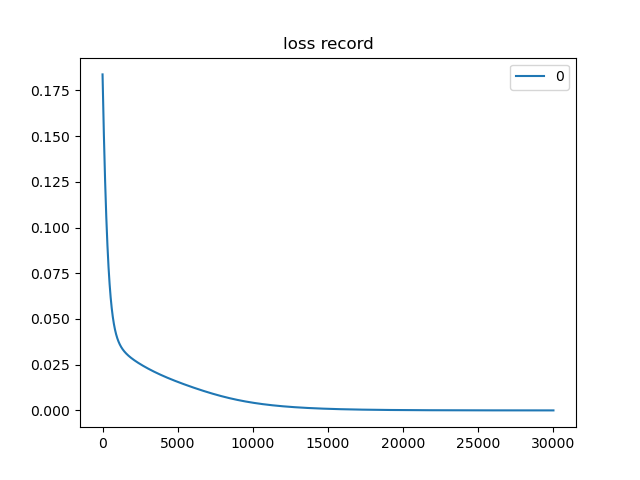

  0%|          | 0/30000 [00:00<?, ?it/s]

In [3]:

parameterRecords = {} # Record the parameters of multiple attempts
c = 0.1 # l2 loss 
fig = plt.figure()
for i in range(1):
    tempara = {}
    x,y,z = df.x.to_numpy(),df.y.to_numpy(),df.z.to_numpy()
    # obtain the assumed parameters
    lossrecord = []
    #theta = np.random.randn(8) # random initialize the number
    theta = [1.]*8
    my_Gradient(x,y,z,theta,0.01,30000,lossrecord,batchsize=len(x))
    tempara['theta'] = theta
    parameterRecords[i] = tempara
    plt.plot(range(len(lossrecord)),lossrecord,label=str(i))
plt.title("loss record")
plt.legend()
plt.show()

In [4]:
parameterRecords # the parameters

{0: {'theta': [0.999873779163616,
   0.9988769331824238,
   2.7333781419303387,
   1.9662649155331968,
   0.5001136177763174,
   2.0052540570684765,
   1.9979913722208484,
   2.0002687080279435]}}

<IPython.core.display.Javascript object>


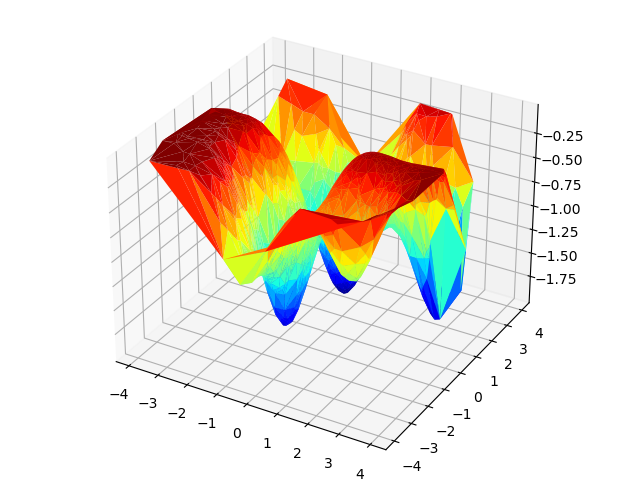

In [5]:
# Fit the resulting graph
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(x, y, my_func(x,y,theta), cmap=cm.jet, linewidth=0.2)
plt.title("The fitting function")
plt.show()

In [6]:
# find the minima 

def get_partional(x,y):
    """get x,y partional gradient
    """
    part = [0]*5
    part[0] = np.exp(-((x+theta[0])**2+(y+theta[1])**2)),(x+theta[0])*2,(y+theta[1])*2 # _part0 ,dx,dy # e^{-\left((x+\theta_0)^{2}+(y+\theta_1)^{2}\right)}
    part[1] = np.exp(-((x-theta[2])**2+(y-theta[3])**2)),(x-theta[2])*2,(y-theta[3])*2 # _part1, dx,dy # e^{-\left((x-\theta_2)^{2}+(y-\theta_3)^{2}\right)}
    part[2] = np.exp(-((x+theta[4])**2)),(x+theta[4])*2,0 # _part2,dx,dy # e^{-(x+\theta_4)^{2}}
    part[3] = np.exp(-(y-theta[5])**2),0,(y-theta[5])*2 # _part3,dx,dy # e^{-(y-\theta_5)^{2}}
    part[4] = np.exp(-(x-theta[6])**2-(y+theta[7])**2),(x-theta[6])*2,(y+theta[7])*2 # _part4,dx,dy # e^{-\left((x-\theta_6)^{2}+(y+\theta_7)^{2}\right)}
    return sum([part[i][0]*part[i][1] for i in range(5)]),sum([part[i][0]*part[i][2] for i in range(5)]) #all dx,dy
    
def find_single_minima(startPoint,epsilon=1e-6,lr=0.01):
    fn = my_func
    x,y = startPoint
    step = 0
    while True:
        pre = fn(x,y,theta)
        dx,dy = get_partional(x,y)
        x -= lr*dx
        y -= lr*dy
        cur = fn(x,y,theta)
        # stop condition
        if cur > pre: # overshoot
            print("lr = {} is over shoot".format(lr))
            break
        if pre - cur < epsilon:# stop condition
            break
        if step > 10000:# stop steps
            break
        step += 1
    return x,y,cur,step

def find_all_minima(lr):
    fourPoint = [(3,3),(2,-2),(-2,-2),(2,-2)] # four starting points
    localminima = [find_single_minima(i,lr=lr) for i in fourPoint]
    print("All local minimas are here:")
    for i in localminima:
        print("x={} , y={}, z={}, iteration={}".format(i[0],i[1],i[2],i[3]))
    localminima.sort(key=lambda x: x[2],reverse=True)
    print("The global minima is :")
    print("x={} , y={}, z={}, iteration={}".format(localminima[-1][0],localminima[-1][1],localminima[-1][2],localminima[-1][-1]))
    return localminima

In [7]:
lrlist = [0.01,0.05,0.1,1]
for i in lrlist:
    print("==============learning_rate = {}============".format(i))
    find_all_minima(lr=i)
    

==============learning_rate = 0.01============
All local minimas are here:
x=2.7381660006975235 , y=1.986052371114389, z=-1.9992449667731869, iteration=218
x=1.99786769026446 , y=-2.000067754210808, z=-1.0019960772185657, iteration=17
x=-0.7497292139228486 , y=-1.0038687858787434, z=-1.8792270085047587, iteration=335
x=1.99786769026446 , y=-2.000067754210808, z=-1.0019960772185657, iteration=17
The global minima is :
x=2.7381660006975235 , y=1.986052371114389, z=-1.9992449667731869, iteration=218
==============learning_rate = 0.05============
All local minimas are here:
x=2.7352888255088494 , y=1.9857901327572491, z=-1.999264926528302, iteration=50
x=1.9949444438946555 , y=-2.0001590420966804, z=-1.0020163105513935, iteration=11
x=-0.7496742961735755 , y=-1.000797177798244, z=-1.8792479446683743, iteration=74
x=1.9949444438946555 , y=-2.0001590420966804, z=-1.0020163105513935, iteration=11
The global minima is :
x=2.7352888255088494 , y=1.9857901327572491, z=-1.999264926528302, iterati

Answer the result here: 

We assume the underlying function is like $-\left\{e^{-\left((x+\theta_0)^{2}+(y+\theta_1)^{2}\right)}+e^{-\left((x-\theta_2)^{2}+(y-\theta_3)^{2}\right)}+e^{-(x+\theta_4)^{2}}+e^{-(y-\theta_5)^{2}}+e^{-\left((x-\theta_6)^{2}+(y+\theta_7)^{2}\right)}\right\}$.We use the giving data `x,y,z` from `P2_1.csv` and gradient descent optimizer to optimize the mean square error and find the parameters.  After getting the parameters, we choose the 4 starting points $(3,3),(2,-2),(-2,-2),(2,-2)$ ,and use the required learning rate to update `(x,y)` . It is easy to get there are 4 local minimas from the trisurf graph. We find that big learning rate(more than 0.1)  will be overshoot.

### Classification - Wine Quality 

In the given data, `winequality-red.csv`,there are 12 features and the target is “quality”. You are going to implement three classifiers to classify the wine quality. 

A. Exploratory Data Analysis: (10 pts)

- a. Find missing value features and impute the value using mean, median, and 0. 
- b. Make histograms and determine which method in A-a is the most appropriate. 
- c. The wine quality is rated from 3 to 8. Categorize the quality to be a binary categorical data as good and bad.

In [8]:
# from sklearn.preprocessing import normalize
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')# filter unnecessary warning
winedata = pd.read_csv("winequality-red.csv")
# different filling method
winedata_mean = winedata.fillna(winedata.mean())
winedata_zero = winedata.fillna(0)
winedata_median = winedata.fillna(winedata.median())

In [9]:
winedata.isna().sum() # check the total numbers of feature nan count

fixed acidity            19
volatile acidity         32
citric acid             170
residual sugar           38
chlorides                51
free sulfur dioxide      80
total sulfur dioxide     57
density                  58
pH                       34
sulphates                61
alcohol                  22
quality                   0
dtype: int64

<IPython.core.display.Javascript object>


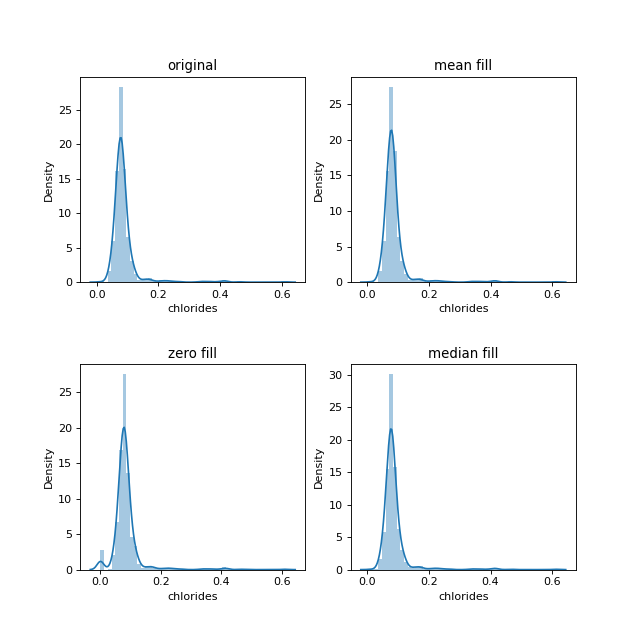

Text(0.5, 1.0, 'median fill')

In [10]:
# select a feature to compare the performance of different methods
plt.figure(figsize=(8,8),dpi=80)
plt.subplots_adjust(wspace =0.2, hspace =0.4)
ax1 = plt.subplot(221)
sns.distplot(winedata['chlorides'])
ax1.set_title("original")
ax2 = plt.subplot(222)
sns.distplot(winedata_mean['chlorides'])
ax2.set_title("mean fill")
ax3 = plt.subplot(223)
sns.distplot(winedata_zero['chlorides'])
ax3.set_title("zero fill")
ax4 = plt.subplot(224)
sns.distplot(winedata_median['chlorides'])
ax4.set_title("median fill")

Discussion: median filling method is the best. The histogram of median filling approach is the most similar with the original distribution.Note that the median filling method will increase the density from 25 to 30 instead of keeping same.

In [11]:
winedata_mean['quality'] = winedata_mean['quality'].apply(lambda x: 1 if x>5 else 0) # 0 for bad and 1 for good. And alse it will help next tasks

In [12]:
alldata = winedata_mean.to_numpy()

In [13]:
split = 0.7 # 0.7 for train datasets and 0.3 for test datasets
train,test = alldata[:int(len(alldata)*split)],alldata[int(len(alldata)*split):]

In [14]:
train_data = train[:,:-1]
train_label= train[:,-1]
test_data  = test[:,:-1]
test_label = test[:,-1]

In [15]:
def normalize(data,mean=[],std=[]):
    """Standard normalize the dataset.
    Return: the dataset and mean,std.
    When normalize train data, we will get the mean and std .
    And we will use them on test data.
    """
    mean = data.mean(axis=0) if len(mean)==0 else mean 
    std  = data.std(axis=0) if len(std)==0 else std
    return (data - mean) / std,mean,std

In [16]:
train_data,mean,std = normalize(train_data)# get the mean and std from train dataset 
print(mean.shape,std.shape)
test_data,_,_  = normalize(test_data,mean,std) # use the train dataset val to test dataset

(11,) (11,)


In [17]:
def accuracy(pred,groundtruth):
    pred = pred.reshape(-1,1)
    groundtruth = groundtruth.reshape(-1,1)
    correct = (pred == groundtruth)
    return np.sum(correct)/len(pred)

B. Implement KNN function, my_KNN, to classify the good and bad wine quality. (10 pts)

In [18]:
def my_KNN(train_data,train_label,test_data,k=10,sigma=3):
    """my_KNN : using distance weighted vote
    k: k neighborhood from train_data
    sigma: distance weighted will be transformed into Gaussian distribution.Sigma is the parameter of Gaussian distribution.
    Return:
        array: type np.array of test_data_label
    """
    res = []
    for each_test_data in range(test_data.shape[0]):
        distance = ((train_data - test_data[each_test_data])**2).sum(1)**0.5 # get the distance matrices
        top_k    = np.argsort(distance)[0:k] # arg sort and get the top k shortest train node
        weight   = distance[top_k]
        weight_transform = np.exp(-weight**2 /(2*sigma*sigma)) # Gaussian distribution
        top_k_label = train_label[top_k]
        top_k_label[top_k_label ==0] = -1
        top_k_label = top_k_label * weight_transform # weighted vote
        test_label = 0 if sum(top_k_label)<0 else 1 
        res.append(test_label)
    return np.array(res)

pred = my_KNN(train_data,train_label,test_data)
accuracy(pred,test_label)

0.6833333333333333

C. Implement LDA, my_LDA, to classify the good and bad wine quality. (15 pts)

In [19]:
class my_LDA:
    """LDA: Linear Discriminant Analysis
    """
    def __init__(self):
        self.w = None
    
    def fit(self,train_data,train_label):
        train_data_0 = train_data[train_label == 0]
        train_data_1 = train_data[train_label == 1]
        mean_0       = np.mean(train_data_0, axis=0)# get the 0 class train dataset mean
        mean_1       = np.mean(train_data_1, axis=0)# get the 1 class train dataset mean
        sigma_0      = np.dot((train_data_0-mean_0).T,train_data_0-mean_0) # 0 class covariance matrix
        sigma_1      = np.dot((train_data_1-mean_1).T,train_data_1-mean_1) # 1 class covariance matrix
        sw           = sigma_0 + sigma_1 # total covariance matrix
        sw_inv       = np.linalg.inv(sw) # S_w total covariance matrix inverse
        gap          = mean_0 - mean_1
        self.w = np.dot(sw_inv,gap)# w=S_w^{-1}(\mu_0-\mu_1)
        self.c_0 = np.dot(self.w.T,mean_0)# center point of 0 class
        self.c_1 = np.dot(self.w.T,mean_1)# center point of 1 class
    
    def predict(self,data):
        predict = np.dot(data,self.w)
        res = []
        for i in range(len(data)):
            p = 0 if abs(predict[i]-self.c_0) <= abs(predict[i]-self.c_1) else 1 # 1 dimensional distance discriminate
            res.append(p)
        return np.array(res)
    
lda = my_LDA()
lda.fit(train_data,train_label)
pred = lda.predict(test_data)
accuracy(pred,test_label)

0.7520833333333333

D. Implement Logistic Regression, my_LogisticRegression, to classify the wine quality. (20 pts)

<IPython.core.display.Javascript object>


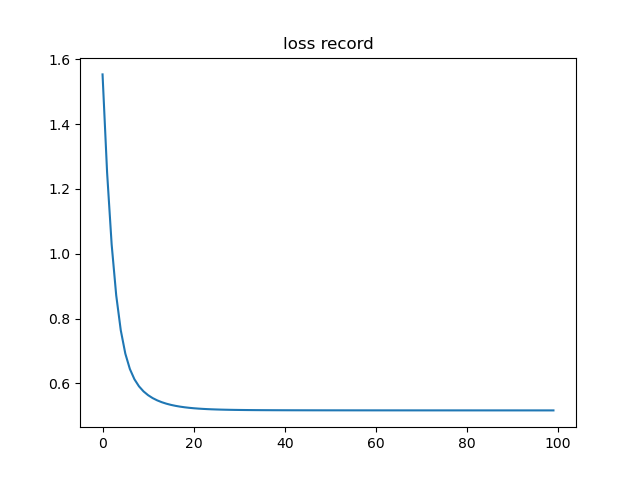

0.743521000893655

In [20]:
class my_lr:
    """lr : Logistic Regression
    """
    def __init__(self,epoch=100,lr=0.001,verbose=False,shuffle=True):
        self.w = None
        self.bairs=np.random.rand()
        self.epoch = epoch
        self.lr = lr
        self.shuffle=shuffle # shuffle train dataset
        self.verbose = verbose# print the loss information to screen
        self.lossrecord = []
    
    def linearfunction(self,x):
        return np.dot(x,self.w) + self.bairs
    
    def pfunction(self,x):# predict function
        temp = self.linearfunction(x)
        return 1 / (1 + np.exp(- temp))
    
    def lossfunction(self,y_pred,y):# cross entropy
        loss = -y*np.log(y_pred) - (1-y)*np.log(1-y_pred)
        return loss
    
    def lossplot(self):# plot the loss 
        plt.figure()
        plt.plot(range(len(self.lossrecord)),self.lossrecord)
        plt.title("loss record")
        plt.show()
    
    def fit(self,train_data,train_label):
        samplesCount,featureCount = train_data.shape
        self.w = np.ones((featureCount,))
        for epoch in range(self.epoch):
            self.y_pred= self.pfunction(train_data)
            loss = np.mean(self.lossfunction(self.y_pred,train_label))
            self.lossrecord.append(loss) # loss record
            dw   = np.dot((self.y_pred - train_label).T,train_data)# delta w 
            dbairs = np.sum(self.y_pred - train_label)# delta bairs
            self.w -= self.lr * dw # gradient descent
            self.bairs -= self.lr * dbairs
            if self.verbose :
                print("epoch {}, loss {}".format(epoch,loss))
        self.lossplot()
                
    def predict(self,data): 
        predict = self.pfunction(data)
        predict[predict>=0.5] = 1
        predict[predict<0.5] = 0
        return predict
    
lr = my_lr()
lr.fit(train_data ,train_label)
pred = lr.predict(train_data)
accuracy(pred,train_label)

E. Use the implemented classifiers and report the accuracy of classifications. Present the result in dataframe. (5 pts)

<IPython.core.display.Javascript object>


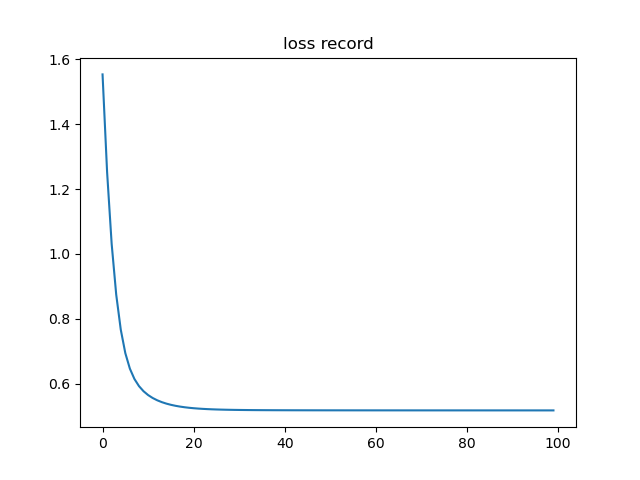

In [21]:
allResult = {}

# KNN 
train_data_accuracy = accuracy(my_KNN(train_data,train_label,train_data),train_label)
test_data_accuracy =  accuracy(my_KNN(train_data,train_label,test_data),test_label)
allResult['my_KNN'] = [train_data_accuracy,test_data_accuracy]

# LDA
lda = my_LDA()
lda.fit(train_data,train_label)
train_data_accuracy = accuracy(lda.predict(train_data),train_label)
test_data_accuracy  = accuracy(lda.predict(test_data),test_label)
allResult['my_LDA'] = [train_data_accuracy,test_data_accuracy]

# Logistic Regression
lr = my_lr()
lr.fit(train_data ,train_label)
train_data_accuracy = accuracy(lr.predict(train_data),train_label)
test_data_accuracy  = accuracy(lr.predict(test_data),test_label)
allResult['my_Logistic Regression'] = [train_data_accuracy,test_data_accuracy]

In [22]:
allR = pd.DataFrame(allResult,index=['train_data_accuracy','test_data_accuracy'])

In [23]:
allR

,my_KNN,my_LDA,my_Logistic Regression
train_data_accuracy,0.821269,0.735478,0.743521
test_data_accuracy,0.683333,0.752083,0.756250
